In [76]:
import pandas as pd

train_test_split() : 학습/테스트 데이터 세트 분리

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer, TFBertForSequenceClassification

In [11]:
# 경고를 무시함
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리

In [106]:
# 데이터 읽어오기
df = pd.read_csv("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv", delimiter=',')
 
df.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [107]:
# 라벨: 0인 데이터(중립) 삭제
df_need = df[df.label != 0]
# 컬럼: Q, label만 추출
df_need = df_need.loc[:, ['Q', 'label']]
df_need.head()

,Q,label
5290,1000일 만난 여자친구와 이별,1
5291,10년 연애. 헤어졌습니다.,1
5292,10년 연애사 되돌아보니 다 부질없네,1
5293,10년 연예의끝,1
5294,10년만나다 헤어지네,1


In [108]:
# label값을 0, 1만 가지도록 수정
df_need['label'] = df_need['label'] - 1
df_need.head() # 확인용 출력

,Q,label
5290,1000일 만난 여자친구와 이별,0
5291,10년 연애. 헤어졌습니다.,0
5292,10년 연애사 되돌아보니 다 부질없네,0
5293,10년 연예의끝,0
5294,10년만나다 헤어지네,0


### 데이터 전처리(추가)

##### !! 부정이 더 많이 나오는 문제 발생

-> 확인 결과 부정이 데이터가 더 많았음<br/>
-> 긍부정 갯수를 동일하게 하여 다시 학습

In [109]:
df_positive = df_need[df_need.label == 1]
df_positive.head()

,Q,label
8860,짝사랑만큼 고통스러운 건 없겠지.,1
8861,1년 넘게 만났는데 지금도 불타올라,1
8862,1년 동거 중인데 계속 좋아,1
8863,1년 동거하고 결혼했어,1
8864,1년 만났는데도 그 사람에 대해 잘 모르겠어,1


In [110]:
df_negative = df_need[df_need.label == 0]
df_negative.head()

,Q,label
5290,1000일 만난 여자친구와 이별,0
5291,10년 연애. 헤어졌습니다.,0
5292,10년 연애사 되돌아보니 다 부질없네,0
5293,10년 연예의끝,0
5294,10년만나다 헤어지네,0


In [111]:
print(f"데이터 갯수\npositive: {df_positive['label'].count()}\nnegative: {df_negative['label'].count()}")
MIN_LEN = min(df_positive['label'].count(), df_negative['label'].count())
print(f"{MIN_LEN}으로 설정")

데이터 갯수
positive: 2963
negative: 3570
2963으로 설정


In [112]:
df_negative = df_negative.sample(frac=1).reset_index(drop=True)
df_negative.head()

,Q,label
0,하아 너무 많이 힘드네 ㅜㅜ,0
1,하아 다시 또 터진 눈물,0
2,혼자 있는 시간이 정말 힘드네,0
3,상처준 사람 잘살고 있더라.,0
4,제가 이상한 건가요?,0


In [113]:
df_negative= df_negative.iloc[:MIN_LEN,:]
df_positive = df_positive.iloc[:MIN_LEN,:]

In [115]:
df_negative.count(), df_positive.count()

(Q        2963
 label    2963
 dtype: int64,
 Q        2963
 label    2963
 dtype: int64)

In [118]:
df_shuffled = pd.concat([df_negative,df_positive])

In [120]:
df_shuffled

,Q,label
0,하아 너무 많이 힘드네 ㅜㅜ,0
1,하아 다시 또 터진 눈물,0
2,혼자 있는 시간이 정말 힘드네,0
3,상처준 사람 잘살고 있더라.,0
4,제가 이상한 건가요?,0
...,...,...
11818,훔쳐보는 것도 눈치 보임.,1
11819,훔쳐보는 것도 눈치 보임.,1
11820,흑기사 해주는 짝남.,1
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,1


In [121]:
df_shuffled = df_shuffled.sample(frac=1).reset_index(drop=True)  # 행 섞기
df_shuffled # 확인용 출력

,Q,label
0,명품선물 꼭 해야할까?,1
1,보고싶은데,0
2,그 사람이 저를 그만 좋아하게 하는 방법 있을까요?,1
3,짝사랑 중인데 나혼자 드라마 찍음.,1
4,썸타는거 친구한테 이야기 한고 싶다.,0
...,...,...
5921,좋아하는데 자꾸 짜증나기도 해.,1
5922,여자친구가 힘들어하는데 내가 뭘 해줄 수 있을까?,1
5923,썸 타는 것도 귀찮아.,1
5924,비오는데 우산 챙겨 갔는지 모르겠네,0


In [122]:
df_shuffled['label'].values

array([1, 0, 1, ..., 1, 0, 1])

In [124]:
df.head()

,Q,label
0,명품선물 꼭 해야할까?,1
1,보고싶은데,0
2,그 사람이 저를 그만 좋아하게 하는 방법 있을까요?,1
3,짝사랑 중인데 나혼자 드라마 찍음.,1
4,썸타는거 친구한테 이야기 한고 싶다.,0


In [126]:
df = df_shuffled #최종 확인 후 덮어쓰기

In [127]:
df['label']

0       1
1       0
2       1
3       1
4       0
       ..
5921    1
5922    1
5923    1
5924    0
5925    1
Name: label, Length: 5926, dtype: int64

In [131]:
# 섞은 데이터를 train, test로 나눈다
labels = df['label'].values
# labels = torch.tensor(labels)

In [133]:
labels_arr = labels.tolist()
print("부정 갯수: ", labels_arr.count(0))
print("긍정 갯수: ", labels_arr.count(1))

부정 갯수:  2963
긍정 갯수:  2963


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df['Q'], labels, random_state=42, test_size=0.2)

In [136]:
X_train

429                         그놈 생일이예요
5474                      생일축하했다 바보야
3616            썸 타는데 사랑하다고 말할 수 있음?
5413    짝남이랑 끝났는데 그래도 매일 볼 수 있어서 좋아.
2784                            썸일까?
                    ...             
3772                        우리서로 애써봐
5191     좋아하는 여선배가 있는데 말할 수도 없고 어떡함.
5226                            약 올라
5390                  결국 또 다시 이별이 오네
860                  노래 듣는데 참 공감이 되네
Name: Q, Length: 4740, dtype: object

### 토큰화

In [140]:
# 토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [141]:
def encode(data, tokenizer):
    input_ids = []
    attention_masks = []
    token_type_ids = []
 
    for text in data:
        tokenized_text = tokenizer.encode_plus(text,
                                            max_length=50,
                                            add_special_tokens = True,
                                            pad_to_max_length=True,
                                            return_attention_mask=True,
                                              truncation=True)
        
        input_ids.append(tokenized_text['input_ids'])
        attention_masks.append(tokenized_text['attention_mask'])
        token_type_ids.append(tokenized_text['token_type_ids'])
    
    return input_ids, attention_masks, token_type_ids

In [142]:
#학습데이터 토큰화
train_input_ids, train_attention_masks, train_token_type_ids = encode(X_train, tokenizer)
 
#테스트데이터 토큰화
test_input_ids, test_attention_masks, test_token_type_ids = encode(X_test, tokenizer)

여기서 attention_masks들은 모두 0만 가진 배열들

BERT모델은 원래 두개의 문장을 입력받기 때문에 동일한 구조로 사용하기 위해서 해당 정보도 추출한다고 한다

In [143]:
#학습데이터 토큰화
train_input_ids, train_attention_masks, train_token_type_ids = encode(X_train, tokenizer)
 
#테스트데이터 토큰화
test_input_ids, test_attention_masks, test_token_type_ids = encode(X_test, tokenizer)


### 데이터 형태 변경

Bert에 입력하기 위해 데이터 형태를 딕셔너리로 변경

In [144]:
#딕셔너리 형태로 변환해서 출력 
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
      }, label
      
 #데이터를 BERT에 넣을 수 있는 형태로 변경 
def data_encode(input_ids_list, attention_mask_list, token_type_ids_list, label_list):
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [33]:
BATCH_SIZE = 32
 
#학습 데이터
train_data_encoded = data_encode(train_input_ids, train_attention_masks, train_token_type_ids,y_train).shuffle(10000).batch(BATCH_SIZE)
 
#평가 데이터
test_data_encoded = data_encode(test_input_ids, test_attention_masks, test_token_type_ids, y_test).batch(BATCH_SIZE)

### 모델 학습

In [147]:
model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", 
    num_labels = 2,
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [148]:
model

In [149]:
optimizer = tf.keras.optimizers.Adam(1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
NUM_EPOCHS = 25
history = model.fit(train_data_encoded, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=test_data_encoded)

Epoch 1/25
149/149 [==============================] - 80s 294ms/step - loss: 0.3651 - accuracy: 0.8323 - val_loss: 0.2268 - val_accuracy: 0.9047
Epoch 2/25
149/149 [==============================] - 40s 268ms/step - loss: 0.2076 - accuracy: 0.9165 - val_loss: 0.2014 - val_accuracy: 0.9148
Epoch 3/25
149/149 [==============================] - 40s 269ms/step - loss: 0.1470 - accuracy: 0.9475 - val_loss: 0.2003 - val_accuracy: 0.9283
Epoch 4/25
149/149 [==============================] - 40s 269ms/step - loss: 0.1023 - accuracy: 0.9643 - val_loss: 0.2736 - val_accuracy: 0.9199
Epoch 5/25
149/149 [==============================] - 40s 268ms/step - loss: 0.0855 - accuracy: 0.9717 - val_loss: 0.2381 - val_accuracy: 0.9275
Epoch 6/25
149/149 [==============================] - 40s 268ms/step - loss: 0.0595 - accuracy: 0.9816 - val_loss: 0.2579 - val_accuracy: 0.9250
Epoch 7/25
149/149 [==============================] - 40s 266ms/step - loss: 0.0391 - accuracy: 0.9859 - val_loss: 0.2938 - val_ac

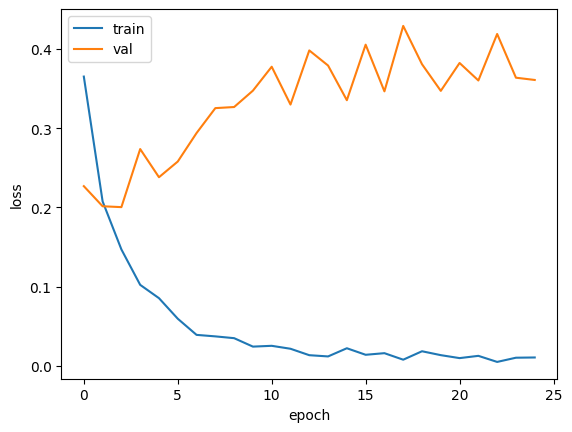

In [150]:
#loss 확인
 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [156]:
model.save_pretrained('guru_model.h5')